# ⚖️ Notebook: evaluation_and_threshold.ipynb

**Goal:** Convert regression outputs into health classes.**

### Include
- Load predictions
- Apply default threshold 0.6 (configurable)
- Produce confusion matrix, accuracy/precision/recall
- Visualize prediction vs health status
- (Optional) Compare with simple alternative (Polynomial/Ridge)

### Deliverable
- Summary table + evaluation visuals


## 🧩 Sprint 3 – Task 4: Summarize Results with Metrics and Confusion Table

We convert the regression output (predicted SOH) to classes using a threshold (default **0.6**):
- **Healthy** if SOH ≥ threshold
- **Has a Problem** if SOH < threshold

Then we compare predicted classes vs. actual classes from the ground-truth SOH and compute:
**Accuracy, Precision, Recall, F1**, and show a **confusion matrix**.  


In [7]:
# Paths + imports
import os
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)

import matplotlib.pyplot as plt

# Optional: seaborn heatmap (comment out if not installed)
import seaborn as sns

# --- Base paths (works from repo root OR /notebooks) ---
BASE = ".." if os.path.basename(os.getcwd()) == "notebooks" else "."
DATA_PATH   = f"{BASE}/data/cleaned_pulsebat.csv"
MODEL_PATH  = f"{BASE}/models/soh_linear_model.pkl"
REPORT_DIR  = f"{BASE}/reports"
os.makedirs(REPORT_DIR, exist_ok=True)

print("Using paths:")
print("  DATA_PATH  :", DATA_PATH)
print("  MODEL_PATH :", MODEL_PATH)
print("  REPORT_DIR :", REPORT_DIR)

# --- Load data & model ---
df = pd.read_csv(DATA_PATH)
feature_cols = [f"U{i}" for i in range(1, 22)]
target_col = "SOH"

X = df[feature_cols].values
y = df[target_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

model = joblib.load(MODEL_PATH)
y_pred = model.predict(X_test)

print("Shapes:", X_test.shape, y_test.shape, y_pred.shape)


Matplotlib is building the font cache; this may take a moment.


Using paths:
  DATA_PATH  : ../data/cleaned_pulsebat.csv
  MODEL_PATH : ../models/soh_linear_model.pkl
  REPORT_DIR : ../reports
Shapes: (134, 21) (134,) (134,)


Class distribution (True)  [0=Problem,1=Healthy]: {0: np.int64(134)}
Class distribution (Pred.) [0=Problem,1=Healthy]: {0: np.int64(134)}


,Metric,Value
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1,1.0
4,Threshold,0.6


,Pred: Problem (0),Pred: Healthy (1)
Actual: Problem (0),0,0
Actual: Healthy (1),0,134


💾 Saved metrics → ../reports/threshold_metrics.csv
💾 Saved confusion matrix → ../reports/confusion_matrix.csv


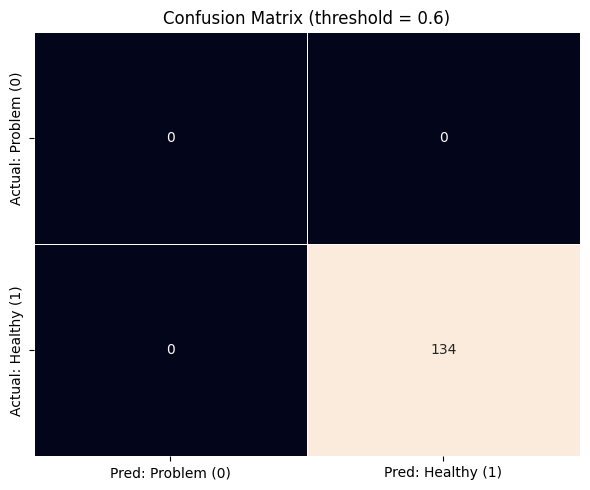

🖼️ Saved plot → ../reports/confusion_matrix.png


In [8]:
# ---- Configuration: default threshold (user can change here) ----
threshold = 0.60  # Customize: e.g., 0.50 or 0.70

# ---- Create ground-truth and predicted classes ----
# 1 = Healthy, 0 = Has a Problem
y_true_cls = (y_test >= threshold).astype(int)
y_pred_cls = (y_pred >= threshold).astype(int)

# ---- Basic distributions ----
unique, counts_true = np.unique(y_true_cls, return_counts=True)
unique, counts_pred = np.unique(y_pred_cls, return_counts=True)
print("Class distribution (True)  [0=Problem,1=Healthy]:", dict(zip([0,1], counts_true)))
print("Class distribution (Pred.) [0=Problem,1=Healthy]:", dict(zip([0,1], counts_pred)))

# ---- Metrics ----
acc  = accuracy_score(y_true_cls, y_pred_cls)
prec = precision_score(y_true_cls, y_pred_cls, zero_division=0)
rec  = recall_score(y_true_cls, y_pred_cls, zero_division=0)
f1   = f1_score(y_true_cls, y_pred_cls, zero_division=0)

metrics_df = pd.DataFrame([
    {"Metric": "Accuracy",  "Value": acc},
    {"Metric": "Precision", "Value": prec},
    {"Metric": "Recall",    "Value": rec},
    {"Metric": "F1",        "Value": f1},
    {"Metric": "Threshold", "Value": threshold},
])

display(metrics_df)

# ---- Confusion Matrix ----
cm = confusion_matrix(y_true_cls, y_pred_cls, labels=[0,1])
cm_df = pd.DataFrame(cm, index=["Actual: Problem (0)", "Actual: Healthy (1)"],
                        columns=["Pred: Problem (0)", "Pred: Healthy (1)"])
display(cm_df)

# ---- Save numeric outputs ----
metrics_csv_path = f"{REPORT_DIR}/threshold_metrics.csv"
cm_csv_path      = f"{REPORT_DIR}/confusion_matrix.csv"

metrics_df.to_csv(metrics_csv_path, index=False)
cm_df.to_csv(cm_csv_path)

print(f"💾 Saved metrics → {metrics_csv_path}")
print(f"💾 Saved confusion matrix → {cm_csv_path}")

# ---- Plot Confusion Matrix ----
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d", linewidths=0.5, cbar=False)
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.tight_layout()
cm_png_path = f"{REPORT_DIR}/confusion_matrix.png"
plt.savefig(cm_png_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"🖼️ Saved plot → {cm_png_path}")
